## Part 1: Analyzing Best-Seller Trends Across Product Categories

#### Objective: Understand the relationship between product categories and their best-seller status.

 Crosstab Analysis:

 Create a crosstab between the product category and the isBestSeller status. Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.
Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy import stats
import statsmodels.api as sm
import numpy as np

In [2]:
uk_df =  pd.read_csv("/Users/adolfoartolamadrigal/Documents/Irohacks/Labs/week4/amz_uk_price_prediction_dataset.csv")

In [3]:
uk_df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


/var/folders/6g/dhv5ylld76zgp_63c85rplcc0000gn/T/ipykernel_2486/2675660768.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  best_sellers = pd.pivot_table(best_sellers, index = "labels", columns="category",values=True, aggfunc="sum")


<Axes: xlabel='labels'>

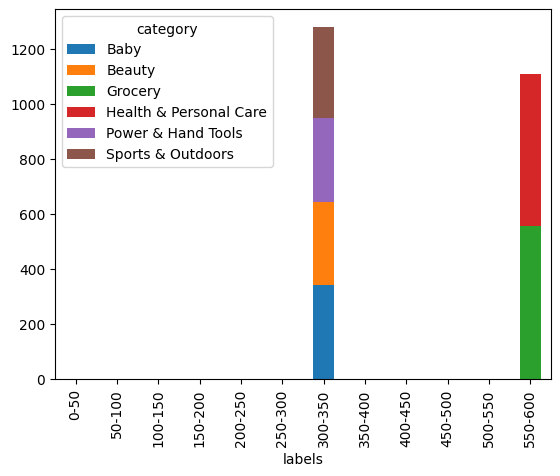

In [4]:
def create_crosstab(df):
    crosstab = pd.crosstab(df["category"],df["isBestSeller"]).sort_values(by = True, ascending = False)
    bins = [i for i in range(0,601,50)]
    labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]
    crosstab["labels"] = pd.cut(crosstab[True],bins = bins, labels=labels)
    best_sellers = crosstab.loc[((crosstab[True]>300) & (crosstab[True]<600))]
    best_sellers = pd.pivot_table(best_sellers, index = "labels", columns="category",values=True, aggfunc="sum")
                                
    return best_sellers

best_sellers = create_crosstab(uk_df)
best_sellers.plot(kind="bar", stacked=True)


In [5]:
crosstab = pd.crosstab(uk_df["category"],uk_df["isBestSeller"]).sort_values(by = True, ascending = False)

crosstab
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)
chi2_statistic, chi2_p_value

(np.float64(36540.202700613874), np.float64(0.0))

## Part 2: Exploring Product Prices and Ratings Across Categories and Brands

### Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.
Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.
Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


### z-score
1. Def: Is the numner of standard deviations from our population mean for a particular datapoint
2. calculo, para cada point de price **z-score = (price-mean_price)/std** 
3. It tells how many standard deviations above or bellow the mean our point is.
4. If we know the mean and the standard deviation, we can compute the z-scores

/var/folders/6g/dhv5ylld76zgp_63c85rplcc0000gn/T/ipykernel_2486/4068367396.py:17: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_no_outliers_plot = pd.pivot_table(data = df_no_outliers, index = "labels", values= "price", aggfunc="count")


<Axes: xlabel='labels', ylabel='price'>

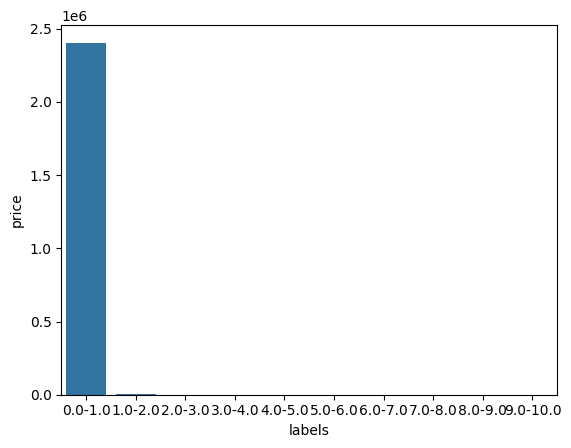

In [19]:
def remove_outliers(df):
    bins = [i for i in range(0,10_001,1000)]
    labels = [f'{bins[i]/1000}-{bins[i+1]/1000}' for i in range(len(bins)-1)]
    df["labels"] = pd.cut(df["price"],bins=bins,labels=labels)
    df['z_score'] = stats.zscore(df['price'])
    
    df_no_outliers = df.loc[
        (df['z_score'] > -3) &
        (df['z_score'] < 3) &
        (df["labels"].notna())
        ]
    return df_no_outliers


df_no_outliers = remove_outliers(uk_df)

df_no_outliers_plot = pd.pivot_table(data = df_no_outliers, index = "labels", values= "price", aggfunc="count")
sns.barplot(data = df_no_outliers_plot, x = "labels",y = "price")




/var/folders/6g/dhv5ylld76zgp_63c85rplcc0000gn/T/ipykernel_2486/1588734825.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_uk_df, x='category', y='price', palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Handmade Home & Kitchen Products'),
  Text(1, 0, 'Sports & Outdoors'),
  Text(2, 0, 'Handmade Gifts'),
  Text(3, 0, 'Fragrances'),
  Text(4, 0, 'Skin Care'),
  Text(5, 0, 'Birthday Gifts'),
  Text(6, 0, 'Handmade Kitchen & Dining'),
  Text(7, 0, 'Bath & Body'),
  Text(8, 0, 'Manicure & Pedicure Products'),
  Text(9, 0, 'Beauty'),
  Text(10, 0, 'Handmade Artwork'),
  Text(11, 0, 'Make-up'),
  Text(12, 0, 'Baby'),
  Text(13, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(14, 0, 'Handmade Home Décor'),
  Text(15, 0, 'Men'),
  Text(16, 0, 'Luggage and travel gear'),
  Text(17, 0, 'Handmade Jewellery'),
  Text(18, 0, 'Women'),
  Text(19, 0, 'Hair Care')])

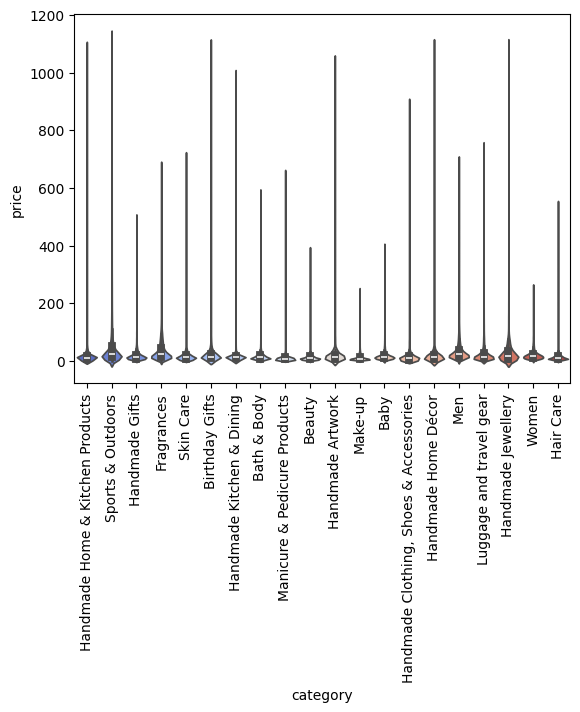

In [7]:
def top_20_categories(df):
    top_categories = pd.pivot_table(data = df, index = "category",values = "asin", aggfunc="count").sort_values(by="asin", ascending=False).head(20)
    filtered_uk_df = df.loc[df["category"].isin(list(top_categories.index)),["category","price"]]
    return filtered_uk_df

filtered_uk_df = top_20_categories(df_no_outliers)

sns.violinplot(data=filtered_uk_df, x='category', y='price', palette="coolwarm")
plt.xticks(rotation=90)



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Fragrances'),
  Text(2, 0, 'Handmade Jewellery'),
  Text(3, 0, 'Men'),
  Text(4, 0, 'Birthday Gifts'),
  Text(5, 0, 'Handmade Artwork'),
  Text(6, 0, 'Luggage and travel gear'),
  Text(7, 0, 'Women'),
  Text(8, 0, 'Handmade Home Décor'),
  Text(9, 0, 'Handmade Gifts')])

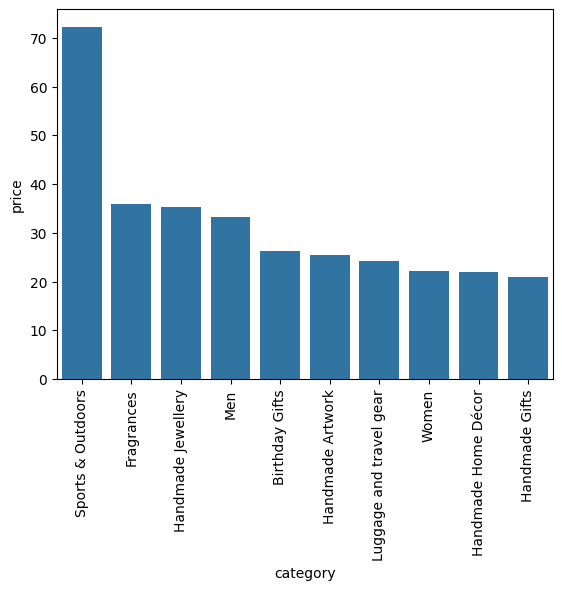

In [8]:
def average_price(df):
    df_avg = pd.pivot_table(data = df, index = "category", values = "price", aggfunc="mean").sort_values(by = "price", ascending=False).head(10).round(2)
    return  df_avg

df_avgerage = average_price(filtered_uk_df)

sns.barplot(data = df_avgerage, x = "category", y = "price")
plt.xticks(rotation=90)

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [9]:
def top_10_prod(df):
    top_10_prod = pd.pivot_table(data = df, index = "category",values = "asin",aggfunc="count").sort_values(by ="asin", ascending=False).head(10)
    top_10_categories = list(top_10_prod.index)
    return top_10_categories

list_top10_categories = top_10_prod(uk_df)

/var/folders/6g/dhv5ylld76zgp_63c85rplcc0000gn/T/ipykernel_2486/2829919757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_stars, x='category', y='stars', palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Fragrances'),
  Text(2, 0, 'Skin Care'),
  Text(3, 0, 'Birthday Gifts'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Beauty'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(9, 0, 'Hair Care')])

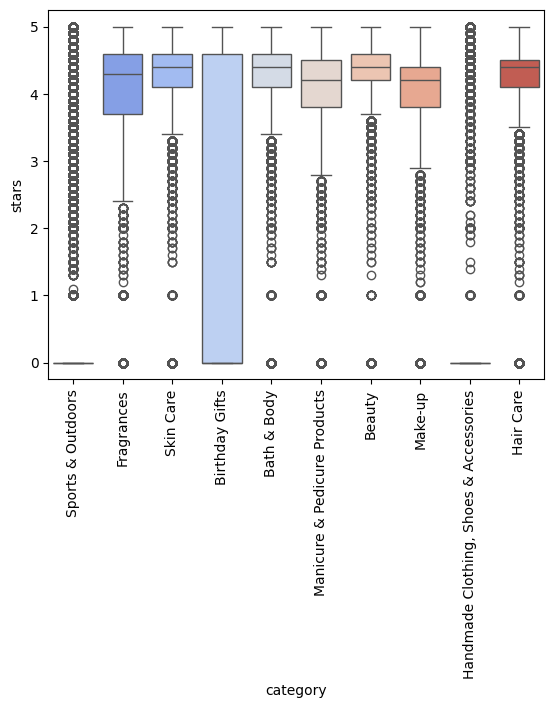

In [10]:
df_stars = uk_df.loc[ uk_df["category"].isin(list_top10_categories),["category","stars"]]

sns.boxplot(data=df_stars, x='category', y='stars', palette="coolwarm")

plt.xticks(rotation=90)

## Part 3: Investigating the Interplay Between Product Prices and Ratings

Objective: Analyze how product ratings (stars) correlate with product prices.

Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?
Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.

In [11]:
correlation = uk_df['price'].corr(uk_df['stars'])
print("correlation is ", correlation.round(2))

correlation is  -0.12


podemos obervar que tiene mucha Skewness hacia la derecha. Muchos de los valores están muy condensados a la derecha, pero que los outliers hacer que se diluyan mucho


<Axes: xlabel='price', ylabel='Count'>

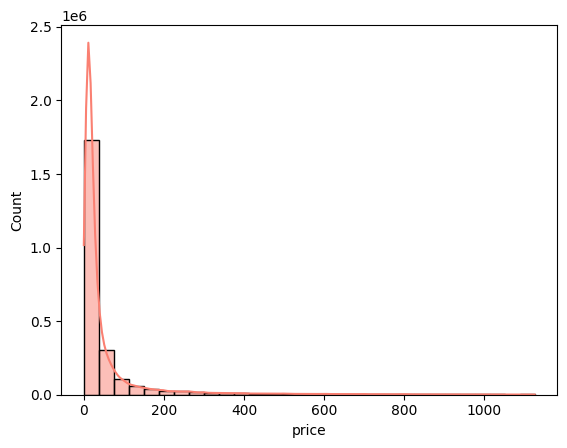

In [27]:
print("podemos obervar que tiene mucha Skewness hacia la derecha. Muchos de los valores están muy condensados a la derecha, pero que los outliers hacer que se diluyan mucho")
sns.histplot(df_no_outliers['price'],bins=30, color="salmon", kde=True)

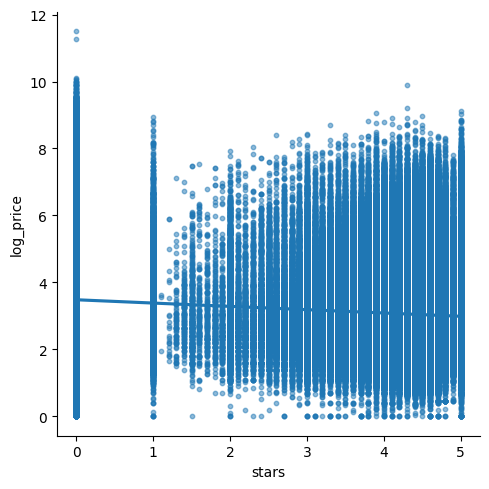

In [24]:
uk_df['log_price'] = np.log1p(uk_df['price'])
sns.lmplot(data=uk_df, x='stars', y='log_price',scatter_kws={'s': 10, 'alpha': 0.5})

In [32]:
uk_df_numercial = uk_df.select_dtypes("number").drop(columns=["z_score","log_price"])

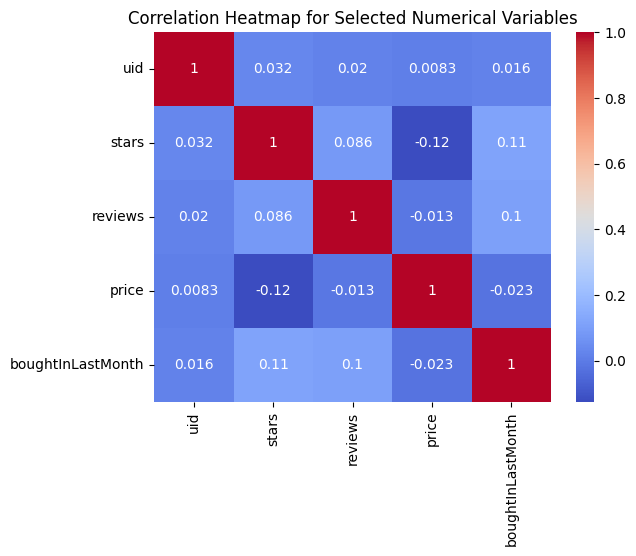

In [34]:
correlation_matrix = uk_df_numercial.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()